- Data : https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import datetime
import folium
import warnings
import missingno as msno
import matplotlib.pyplot as plt
from folium import folium, plugins
from IPython.display import HTML
%matplotlib inline



sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/Food_Inspections.csv")

In [3]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2538166,SWEETGREEN,SWEETGREEN,2818054.0,Restaurant,Risk 1 (High),227 E ONTARIO ST,CHICAGO,IL,60611.0,11/15/2021,License,Not Ready,NaN,41.893263,-87.621959,"(-87.6219587764921, 41.893262977315636)"
1,2538157,THE NOOK,THE NOOK,2457525.0,Children's Services Facility,Risk 1 (High),1929 S ARCHER AVE,CHICAGO,IL,60616.0,11/15/2021,Canvass,Pass,NaN,41.855944,-87.628171,"(-87.62817097120592, 41.85594420862269)"
2,2538133,CHERUBS 1,CHERUBS,1770200.0,Restaurant,Risk 1 (High),2524 W FULLERTON AVE,CHICAGO,IL,60647.0,11/12/2021,Non-Inspection,No Entry,NaN,41.924977,-87.691162,"(-87.69116242232869, 41.92497651650806)"
3,2538129,"CLARK CATERING, INC.","CLARK CATERING, INC.",1224108.0,Catering,Risk 1 (High),8218 S STONY ISLAND AVE,CHICAGO,IL,60617.0,11/12/2021,Non-Inspection,No Entry,NaN,41.745419,-87.585983,"(-87.58598341010826, 41.74541895614782)"
4,2538136,MIMI'S CHICKENS,MIMI'S CHICKENS,2818221.0,NaN,Risk 1 (High),3748 W DIVISION ST,CHICAGO,IL,60651.0,11/12/2021,License,Not Ready,NaN,41.902826,-87.720981,"(-87.72098093839777, 41.902826267103926)"


In [4]:
df['Year'] = pd.DatetimeIndex(df['Inspection Date']).year
df['Month'] = pd.DatetimeIndex(df['Inspection Date']).month
df['Day'] = pd.DatetimeIndex(df['Inspection Date']).day


In [5]:
df.shape

(228330, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228330 entries, 0 to 228329
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    228330 non-null  int64  
 1   DBA Name         228330 non-null  object 
 2   AKA Name         225846 non-null  object 
 3   License #        228312 non-null  float64
 4   Facility Type    223386 non-null  object 
 5   Risk             228261 non-null  object 
 6   Address          228330 non-null  object 
 7   City             228164 non-null  object 
 8   State            228281 non-null  object 
 9   Zip              228271 non-null  float64
 10  Inspection Date  228330 non-null  object 
 11  Inspection Type  228329 non-null  object 
 12  Results          228330 non-null  object 
 13  Violations       166960 non-null  object 
 14  Latitude         227546 non-null  float64
 15  Longitude        227546 non-null  float64
 16  Location         227546 non-null  obje

<AxesSubplot:>

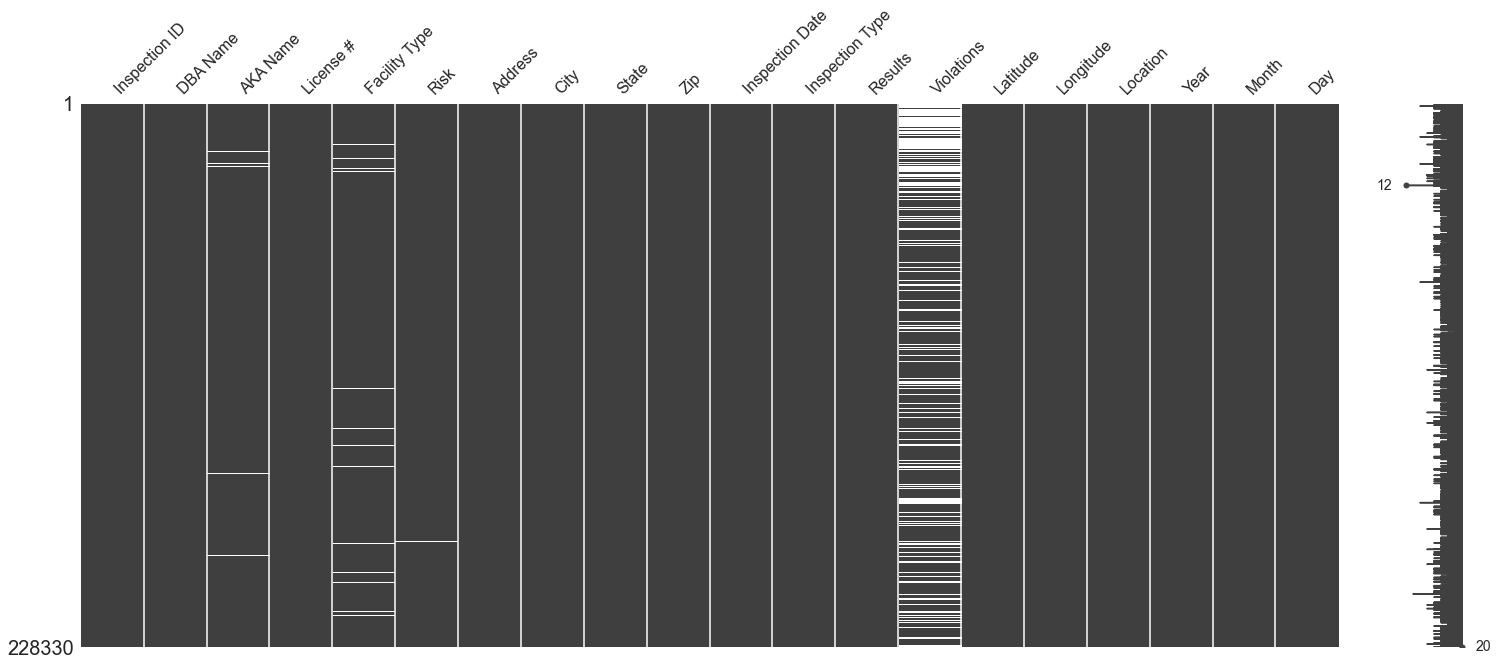

In [7]:
msno.matrix(df)

In [8]:
df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Year', 'Month', 'Day'],
      dtype='object')

In [9]:
df['Results'].unique()

array(['Not Ready', 'Pass', 'No Entry', 'Out of Business', 'Fail',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [10]:
df = df.rename(columns={'DBA Name': 'Legal Name', 'AKA Name': 'Public Name', 'License #':'License', 'Zip' : 'Zipcode' })

In [11]:
df.dtypes

Inspection ID        int64
Legal Name          object
Public Name         object
License            float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zipcode            float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Year                 int64
Month                int64
Day                  int64
dtype: object

In [12]:
df

,Inspection ID,Legal Name,Public Name,License,Facility Type,Risk,Address,City,State,Zipcode,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Year,Month,Day
0,2538166,SWEETGREEN,SWEETGREEN,2818054.0,Restaurant,Risk 1 (High),227 E ONTARIO ST,CHICAGO,IL,60611.0,11/15/2021,License,Not Ready,NaN,41.893263,-87.621959,"(-87.6219587764921, 41.893262977315636)",2021,11,15
1,2538157,THE NOOK,THE NOOK,2457525.0,Children's Services Facility,Risk 1 (High),1929 S ARCHER AVE,CHICAGO,IL,60616.0,11/15/2021,Canvass,Pass,NaN,41.855944,-87.628171,"(-87.62817097120592, 41.85594420862269)",2021,11,15
2,2538133,CHERUBS 1,CHERUBS,1770200.0,Restaurant,Risk 1 (High),2524 W FULLERTON AVE,CHICAGO,IL,60647.0,11/12/2021,Non-Inspection,No Entry,NaN,41.924977,-87.691162,"(-87.69116242232869, 41.92497651650806)",2021,11,12
3,2538129,"CLARK CATERING, INC.","CLARK CATERING, INC.",1224108.0,Catering,Risk 1 (High),8218 S STONY ISLAND AVE,CHICAGO,IL,60617.0,11/12/2021,Non-Inspection,No Entry,NaN,41.745419,-87.585983,"(-87.58598341010826, 41.74541895614782)",2021,11,12
4,2538136,MIMI'S CHICKENS,MIMI'S CHICKENS,2818221.0,NaN,Risk 1 (High),3748 W DIVISION ST,CHICAGO,IL,60651.0,11/12/2021,License,Not Ready,NaN,41.902826,-87.720981,"(-87.72098093839777, 41.902826267103926)",2021,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228325,54219,"MONTICELLO FOOD MART, INC","MONTICELLO FOOD MART, INC",2013259.0,Grocery Store,Risk 2 (Medium),1000 N MONTICELLO AVE,CHICAGO,IL,60651.0,01/08/2010,License Re-Inspection,Pass,NaN,41.899186,-87.717804,"(-87.71780427165159, 41.89918622853627)",2010,1,8
228326,74264,El Cafetal Del Tio Corp,MI CAFETRAL RESTAURANT,1998021.0,Restaurant,Risk 1 (High),1519 W 18 TH ST,CHICAGO,IL,60608.0,01/12/2010,License,Pass,NaN,41.857714,-87.664542,"(-87.66454238198166, 41.8577138739859)",2010,1,12
228327,67749,COCHIAROS PIZZA #2,COCHIAROS PIZZA #2,1044752.0,Restaurant,Risk 1 (High),4741 W FULLERTON AVE,CHICAGO,IL,60639.0,01/05/2010,Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.924141,-87.745529,"(-87.74552933864975, 41.92414063497689)",2010,1,5
228328,120292,CHICAGO'S FISH HUT,CHICAGO'S FISH HUT,1249734.0,NaN,Risk 1 (High),570-2 W ROOSEVELT RD,CHICAGO,IL,60607.0,01/14/2010,Out of Business,Pass,NaN,41.867363,-87.639378,"(-87.63937779501154, 41.867362688170296)",2010,1,14


In [13]:
df.isnull().sum()

Inspection ID          0
Legal Name             0
Public Name         2484
License               18
Facility Type       4944
Risk                  69
Address                0
City                 166
State                 49
Zipcode               59
Inspection Date        0
Inspection Type        1
Results                0
Violations         61370
Latitude             784
Longitude            784
Location             784
Year                   0
Month                  0
Day                    0
dtype: int64

In [14]:
df.dtypes

Inspection ID        int64
Legal Name          object
Public Name         object
License            float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zipcode            float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Year                 int64
Month                int64
Day                  int64
dtype: object

In [15]:
df = df[df['Inspection Type']=='Canvass']
df.shape

(120426, 20)

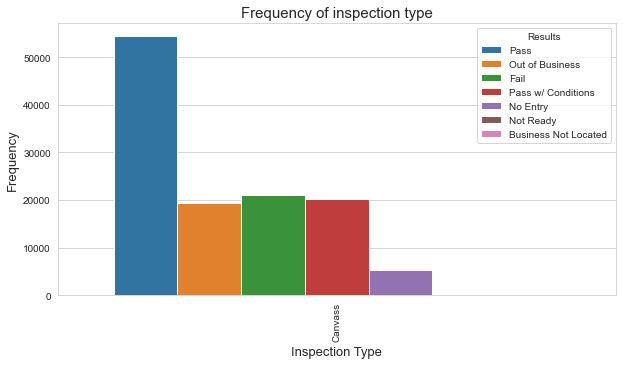

In [16]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Inspection Type", data=df ,hue='Results')
plt.title('Frequency of inspection type', fontsize=15)
plt.xlabel("Inspection Type", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
df.dtypes

Inspection ID        int64
Legal Name          object
Public Name         object
License            float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zipcode            float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Year                 int64
Month                int64
Day                  int64
dtype: object

In [19]:
df.dropna(subset=["Inspection Date", "License", "Latitude", "Longitude"], inplace=True)

In [20]:
df = df[~df.Results.isin(["Out of Business", "Business Not Located", "No Entry", "Not Ready"])]

In [21]:
df['Legal Name'].value_counts()[:10]

SUBWAY                         1824
DUNKIN DONUTS                   764
7-ELEVEN                        288
POTBELLY SANDWICH WORKS LLC     214
CHIPOTLE MEXICAN GRILL          189
POTBELLY SANDWICH WORKS         188
CORNER BAKERY CAFE              168
SUBWAY SANDWICHES               135
MCDONALD'S                      135
JIMMY JOHN'S                    130
Name: Legal Name, dtype: int64

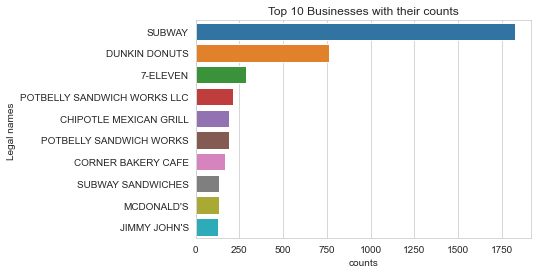

In [22]:
sns.barplot(x=df['Legal Name'].value_counts()[:10],y=df['Legal Name'].value_counts()[:10].index)
plt.title('Top 10 Businesses with their counts')
plt.xlabel('counts')
plt.ylabel('Legal names ')
plt.show()

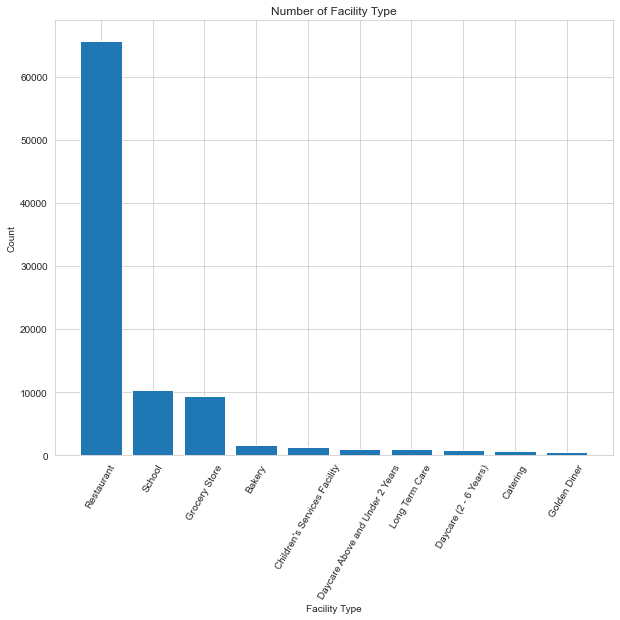

In [23]:
x = df['Facility Type'].value_counts().index.values.astype('str')[:10]
y = df['Facility Type'].value_counts().values[:10]
plt.figure(figsize = (10,8))
plt.bar(x,y)
plt.xticks(rotation = 60)
plt.xlabel("Facility Type")
plt.ylabel("Count")
plt.title("Number of Facility Type")
plt.show()

In [24]:
df['Risk'].value_counts()

Risk 1 (High)      75909
Risk 2 (Medium)    15712
Risk 3 (Low)        3620
Name: Risk, dtype: int64

<AxesSubplot:xlabel='Risk', ylabel='count'>

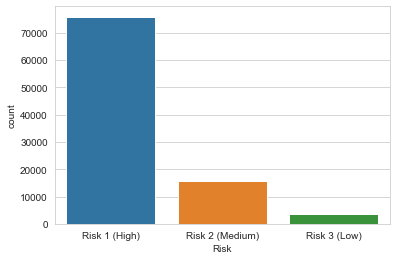

In [25]:
sns.countplot(x=df['Risk'])

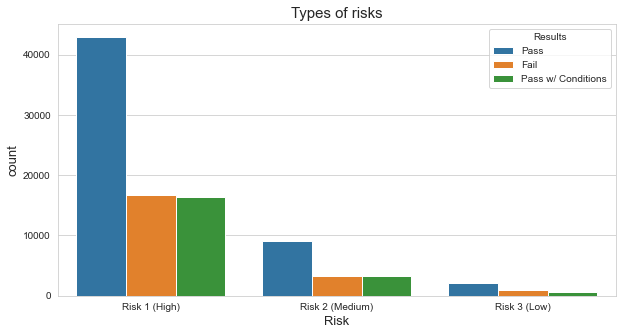

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
fig=sns.countplot(x="Risk", data=df ,hue='Results')
plt.title('Types of risks', fontsize=15)
plt.xlabel("Risk", fontsize=13)
plt.ylabel("count", fontsize=13)
#plt.xticks(rotation=90)
plt.show()

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [28]:
df.columns

Index(['Inspection ID', 'Legal Name', 'Public Name', 'License',
       'Facility Type', 'Risk', 'Address', 'City', 'State', 'Zipcode',
       'Inspection Date', 'Inspection Type', 'Results', 'Violations',
       'Latitude', 'Longitude', 'Location', 'Year', 'Month', 'Day'],
      dtype='object')

In [29]:
df.dtypes

Inspection ID        int64
Legal Name          object
Public Name         object
License            float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zipcode            float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Year                 int64
Month                int64
Day                  int64
dtype: object

In [30]:
new_df=df.drop(['Latitude','Longitude','Location','Inspection Date'],axis=1)

In [31]:
new_df.columns

Index(['Inspection ID', 'Legal Name', 'Public Name', 'License',
       'Facility Type', 'Risk', 'Address', 'City', 'State', 'Zipcode',
       'Inspection Type', 'Results', 'Violations', 'Year', 'Month', 'Day'],
      dtype='object')

In [32]:
le = LabelEncoder() 
new_df['Legal Name'] = le.fit_transform(new_df['Legal Name'])
new_df['Facility Type'] = new_df['Facility Type'].astype(str)
new_df['Facility Type'] = le.fit_transform(new_df['Facility Type'])
new_df['Address'] = le.fit_transform(new_df['Address'])
new_df['Zipcode'] = le.fit_transform(new_df['Zipcode'])
new_df['Results'] = (new_df['Results'].values == 'Fail').astype('int')
new_df['Risk'] = le.fit_transform(new_df['Risk'])
new_df['Inspection Type'] = le.fit_transform(new_df['Inspection Type'])
new_df['Violations'] = le.fit_transform(new_df['Violations'])

In [33]:
x=new_df.drop("Results",axis=1)
y=new_df["Results"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

print(f'Training examples: {x_train.shape[0]:,}')
print(f'Test examples: {x_test.shape[0]:,}')

Training examples: 57,144
Test examples: 38,097


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_vars=['Inspection Type','Violations']
num_vars=['License','Year','Month', 'Day']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan,strategy='mean')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan ,strategy='most_frequent'))])
                          #('create_dummies', OneHotEncoder(handle_unknown='ignore',sparse=False))])
                         #('create_dummies'),LabelEncoder()])


processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)
                                                     ])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer()),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['License', 'Year', 'Month', 'Day']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Inspection Type', 'Violations'])])


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score

clf1 = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', random_state=1)
clf2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf3 = SVC(kernel='rbf',C=1,probability=True)

pipe1 = Pipeline([('processing',processing_pipeline) ,('logreg', clf1)])
pipe2 = Pipeline([('processing', processing_pipeline),('tree', clf2)])
#pipe3 = Pipeline([('processing', processing_pipeline),('svc', clf3)])

labs = ['Logistic Regression', 'Decision Tree', 'SVC']
clfs = [pipe1, pipe2]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10, scoring='accuracy')
    print(f'ROC AUC {scores.mean():.2f} [{lab}]')

ROC AUC 0.78 [Logistic Regression]
ROC AUC 0.84 [Decision Tree]


In [38]:

clf = pipe1
clf.fit(x_train,y_train)

clf_train_predict = clf.predict(x_train)
clf_test_predict = clf.predict(x_test)

clf_train_score = accuracy_score(y_train, clf_train_predict)
clf_test_score = accuracy_score(y_test, clf_test_predict)

print(f'Logistic Regression Training Score: {clf_train_score:.2%}')
print(f'Logistic Regression Test Score: {clf_test_score:.2%}')

Logistic Regression Training Score: 78.14%
Logistic Regression Test Score: 78.00%


In [39]:
import folium
from folium.plugins import MarkerCluster

data_risk1=df[df.Risk=='Risk 1 (High)']

data_risk1_2000=data_risk1[:2000]
Long=data_risk1_2000.Longitude.mean()
Lat=data_risk1_2000.Latitude.mean()
risk1_map=folium.Map([Lat,Long],zoom_start=12)

risk1_distribution_map=plugins.MarkerCluster().add_to(risk1_map)
for lat,lon,label in zip(data_risk1_2000.Latitude,data_risk1_2000.Longitude,data_risk1_2000['Public Name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk1_distribution_map)
risk1_map.add_child(risk1_distribution_map)

risk1_map

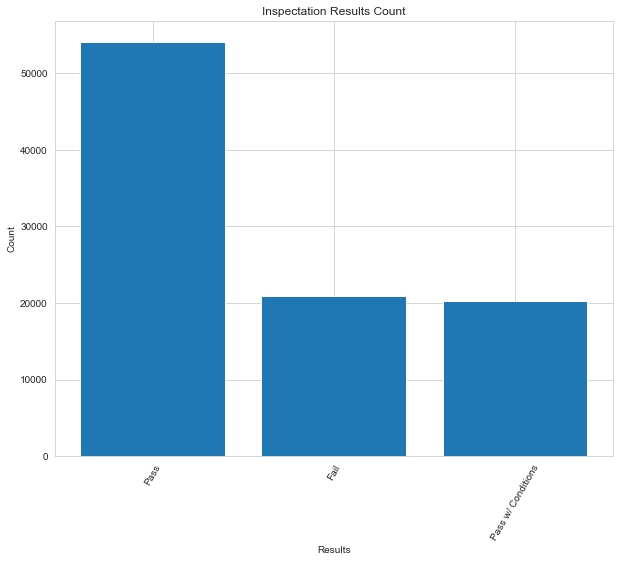

In [40]:
x = df['Results'].value_counts().index.values.astype('str')
y = df['Results'].value_counts().values
plt.figure(figsize = (10,8))
plt.bar(x,y)
plt.xticks(rotation = 60)
plt.xlabel("Results")
plt.ylabel("Count")
plt.title("Inspectation Results Count")
plt.show()

In [41]:
df['Results'].value_counts()

Pass                  54123
Fail                  20871
Pass w/ Conditions    20247
Name: Results, dtype: int64